In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pip install Sastrawi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca file CSV
df = pd.read_csv('Training_Testing_Data16444.csv')

# # Membagi data menjadi data training dan data testing
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# # test_size = 0.2 berarti 20% data akan digunakan untuk testing, sementara 80% digunakan untuk training
# # random_state digunakan untuk mengacak data

# # Menampilkan informasi jumlah data
# print('Jumlah data training:', len(train_data))
# print('Jumlah data testing:', len(test_data))


In [ ]:
# train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)


In [ ]:
# train_data

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# #Train Data

# print("Data shape:",df)

# Emosi1Df = df[df["Label"]=="Gembira"].drop("Label",axis=1)
# Emosi1Df["Label"] = 0

# Emosi2Df = df[df["Label"]=="Sedih"].drop("Label",axis=1)
# Emosi2Df["Label"] = 1

# Emosi3Df = df[df["Label"]=="Muak"].drop("Label",axis=1)
# Emosi3Df["Label"] = 2

# Emosi4Df = df[df["Label"]=="Marah"].drop("Label",axis=1)
# Emosi4Df["Label"] = 3

# Emosi5Df = df[df["Label"]=="Takut"].drop("Label",axis=1)
# Emosi5Df["Label"] = 4

# Emosi6Df = df[df["Label"]=="Terkejut"].drop("Label",axis=1)
# Emosi6Df["Label"] = 5

# df = pd.concat([Emosi1Df,Emosi2Df,Emosi3Df,Emosi4Df,Emosi5Df,Emosi6Df],ignore_index=True)
# print("Final total dataset:",df.shape)

In [ ]:
# train_data

In [ ]:
# # Simpan hasil ke file CSV
# df.to_csv('output.csv', index=False)

In [ ]:
# # Membaca file CSV
# df = pd.read_csv('output (1).csv')

In [ ]:


# # Menggunakan tokenizer dari NLTK
# df['text'] = df['text'].apply(word_tokenize)

# # Menampilkan DataFrame dengan teks yang telah di-tokenisasi
# print(df)


In [ ]:
# # Membaca file CSV
# df = pd.read_csv('Training_Testing_Data16444.csv')  # Ganti 'nama_file.csv' dengan nama file CSV Anda

# # Inisialisasi kolom data dan label
# data_column = 'text'  # Ganti 'kolom_data' dengan nama kolom yang berisi data
# label_column = 'Label'  # Ganti 'kolom_label' dengan nama kolom yang berisi label

# # Mendapatkan label unik
# labels = df[label_column].unique()

# # Mendefinisikan jumlah data testing yang diinginkan per label
# testing_per_label = 4111

# # Menginisialisasi list untuk menyimpan data testing
# testing_data = []

# # Memisahkan data testing dari setiap label
# for label in labels:
#     label_data = df[df[label_column] == label]  # Mendapatkan data dengan label tertentu
#     testing_data.append(label_data.sample(n=testing_per_label, random_state=42))  # Mengambil data testing dari label tertentu

# # Menggabungkan data testing dari setiap label menjadi satu
# testing_data = pd.concat(testing_data)

# # Menghapus data testing dari data asli untuk mendapatkan data training
# training_data = df.drop(testing_data.index)

# # Contoh penggunaan data training dan testing
# print("Data Training:")
# print(training_data)
# print("\nData Testing:")
# print(testing_data)


In [ ]:


# Assuming 'text' is the column containing the text data in your DataFrame
list_of_sent = [word_tokenize(str(sent)) for sent in df["text"]]
w2v_model = gensim.models.Word2Vec(list_of_sent,vector_size=200,window=3,min_count=2,sg=1,negative=10, ns_exponent=0.75, workers=4,epochs=10)#Skipgram sg=1
w2v_words = list(w2v_model.wv.index_to_key)


In [ ]:
# Save the Word2Vec model
model_path = "model_sg.bin"  # Ganti dengan path tempat Anda ingin menyimpan model
w2v_model.save(model_path)


In [ ]:
len(w2v_words)

30955

In [ ]:
#Vectorize train text data
listof_sent_vec=[]
for sent in tqdm(list_of_sent):
    sent_vec = np.zeros(200)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)

Label = df["Label"]
list_col=tuple(range(200))
Scaler = StandardScaler()
data_vec = Scaler.fit_transform(listof_sent_vec)
W2v_data=pd.DataFrame(data=data_vec, columns=list_col)
W2v_data["Label"] = Label
print(W2v_data.head(10))
print(W2v_data.shape)

100%|██████████| 98664/98664 [01:58<00:00, 831.24it/s]


          0         1         2         3         4         5         6  \
0  2.111612 -0.214365 -0.269680 -0.769817 -0.099889 -2.020572  0.961331   
1 -1.040931 -0.249864 -0.276906  0.364012 -0.017790 -0.029420  0.587340   
2 -0.882271  0.916716 -0.452235 -0.012372  0.383448  0.158144  0.689745   
3  0.366224  0.193265  0.726756 -1.379863  0.143266  1.178408  0.129970   
4  0.710576 -0.033936 -0.015391 -1.489693  0.018976  0.276134 -0.146043   
5  0.528686 -0.473078  0.108644 -0.326133 -0.781430  0.321526 -0.244398   
6  0.074807  0.331862  0.368566 -0.316070 -0.035653  1.521161 -0.601727   
7  1.654022  0.804202  1.387928 -0.578686 -0.113236  1.419684  0.262409   
8  1.176571 -0.644159  0.286551 -0.623868  0.019698  0.039768 -1.057406   
9 -1.500645  0.619518 -0.719125  0.590206 -1.025115  0.511377 -0.874054   

          7         8         9  ...       191       192       193       194  \
0 -0.658444  0.526858  0.462526  ...  0.553510  0.324168 -0.221837 -1.255684   
1 -0.179142 -0

In [ ]:

X = W2v_data.drop("Label",axis=1).to_numpy()
X

array([[ 2.11161228e+00, -2.14365006e-01, -2.69680004e-01, ...,
         1.23624881e+00,  2.53838383e-02,  9.39661667e-01],
       [-1.04093131e+00, -2.49863816e-01, -2.76906225e-01, ...,
         1.71484131e-01, -2.69858748e-01, -3.47058779e-02],
       [-8.82271015e-01,  9.16716216e-01, -4.52235203e-01, ...,
        -2.46585093e-01,  2.25091854e-01, -4.75082741e-02],
       ...,
       [ 5.54261029e-01,  1.25785278e+00,  1.45315898e+00, ...,
         4.22513462e-02, -1.23091807e-01, -5.33887127e-01],
       [ 3.35020532e-01,  9.88867477e-01,  6.26182408e-01, ...,
         5.71716581e-01, -4.76449134e-04, -8.44184578e-01],
       [ 1.52075152e+00,  1.17952133e+00, -4.40081870e-01, ...,
        -9.71643368e-01,  7.65382129e-01, -2.25077873e+00]])

In [ ]:
# Load the Word2Vec model
from gensim.models import Word2Vec
model_path = "model_sg.bin"  # Replace with the path where you saved the model
w2v_model = Word2Vec.load(model_path)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'label' is the column containing the corresponding labels in your DataFrame
labels = df['Label'].tolist()

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode labels to integers
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
y = W2v_data["Label"].to_numpy()
y[0:5]

array(['Sedih', 'Sedih', 'Sedih', 'Sedih', 'Sedih'], dtype=object)

In [ ]:
pip install --upgrade keras tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

#import the required library

from sklearn.preprocessing import LabelEncoder
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.layers import LSTM, Flatten, Dropout, Conv1D, Input
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Assuming 'text' is the column containing the text data in your DataFrame
texts = df['text'].tolist()

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(texts)

# Limit the tokenizer vocabulary to the top n words
top_n = 10000  # Set the desired number of top words
tokenizer.num_words = top_n

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)


In [ ]:
# Hitung panjang maksimum dari sequences
max_length = max(len(seq) for seq in sequences)
print("Maximum sequence length:", max_length)


Maximum sequence length: 250


In [ ]:
# Assuming 'label' is the column containing the corresponding labels in your DataFrame
labels = df['Label'].tolist()

# Pad sequences to a fixed length
max_sequence_length = max_length  # Set the maximum sequence length based on the shape of X_train
# Set the desired maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.25, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the vocabulary size
vocab_size = min(top_n, len(tokenizer.word_index)) + 1
print("Vocabulary size:", vocab_size)


Vocabulary size: 10001


In [ ]:
from keras.utils import to_categorical
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Convert labels to categorical representation
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

ValueError: ignored

In [ ]:
# decoded_texts = tokenizer.sequences_to_texts(sequences)
# decoded_labels = np.array(labels)

# # Print the decoded texts and labels
# print(decoded_texts)
# print(decoded_labels)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# # load the dataset but only keep the top n words, zero the rest
# top_words = 10000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:


# import numpy as np

# np.load.__defaults__=(None, True, True, 'ASCII')

# # call load_data with allow_pickle implicitly set to true
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)



In [ ]:
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_val.shape)

Shape of train data: (59198, 250)
Shape of Test data: (24666, 250)
Shape of CV data: (14800, 250)


In [ ]:
# # Convert labels to categorical representation
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_val = label_encoder.transform(y_val)
# y_test = label_encoder.transform(y_test)

In [ ]:
max_review_length = 250
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_cv = sequence.pad_sequences(X_val, maxlen=max_review_length)


In [ ]:
y_train[0:5]

array([2, 5, 4, 4, 0])

In [ ]:
# decoded_texts = tokenizer.sequences_to_texts(sequences)
# decoded_labels = np.array(labels)

# # Print the decoded texts and labels
# print(decoded_texts)
# print(decoded_labels)


In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, GlobalAveragePooling1D, concatenate, Dense, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
from tensorflow.keras import regularizers
import tensorflow as tf

# Load the Word2Vec model
model_path = "model_sg.bin"  # Replace with the path where you saved the model
w2v_model = Word2Vec.load(model_path)

# Get the word vectors
word_vectors = w2v_model.wv

# Create the embedding matrix
embedding_vector_length = 200  # Adjust according to the dimension of the word vectors in your Word2Vec model
embedding_matrix = np.zeros((vocab_size, embedding_vector_length))
for word, index in tokenizer.word_index.items():
    if index < vocab_size and word in word_vectors:
        embedding_matrix[index] = word_vectors[word]

In [ ]:
# Define the model architecture
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)(input_layer)

# CNN Layers
cnn_layer1 = Conv1D(128, kernel_size=3, activation='relu')(embedding_layer)
cnn_layer1 = AveragePooling1D(pool_size=2)(cnn_layer1)
cnn_layer2 = Conv1D(128, kernel_size=4, activation='relu')(embedding_layer)
cnn_layer2 = AveragePooling1D(pool_size=2)(cnn_layer2)
cnn_layer3 = Conv1D(128, kernel_size=5, activation='relu')(embedding_layer)
cnn_layer3 = AveragePooling1D(pool_size=2)(cnn_layer3)
cnn_layer1 = GlobalAveragePooling1D()(cnn_layer1)  # Adjusted
cnn_layer2 = GlobalAveragePooling1D()(cnn_layer2)  # Adjusted
cnn_layer3 = GlobalAveragePooling1D()(cnn_layer3)  # Adjusted
cnn_layer = concatenate([cnn_layer1, cnn_layer2, cnn_layer3])
cnn_layer = Dropout(0.5)(cnn_layer)
cnn_layer = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(cnn_layer)
cnn_layer = Dropout(0.5)(cnn_layer)

# LSTM Layer
lstm_layer = Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)(input_layer)
lstm_layer = LSTM(64)(lstm_layer)  # Modified to a single LSTM layer
lstm_layer = Dropout(0.5)(lstm_layer)

# Embedding Layer
embedding_only_layer = Flatten()(embedding_layer)
embedding_only_layer = Dropout(0.5)(embedding_only_layer)
embedding_only_layer = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(embedding_only_layer)
embedding_only_layer = Dropout(0.5)(embedding_only_layer)

# Concatenate all layers
merged_layer = concatenate([cnn_layer, lstm_layer, embedding_only_layer])
merged_layer = Dropout(0.5)(merged_layer)
output_layer = Dense(6, activation='softmax')(merged_layer)



In [ ]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Create the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with categorical crossentropy loss
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 250, 200)     2000200     ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 248, 128)     76928       ['embedding_2[0][0]']            
                                                                                                  
 conv1d_4 (Conv1D)              (None, 247, 128)     102528      ['embedding_2[0][0]']            
                                                                                            

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.25, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the data splits
print("Shape of train data:", X_train.shape)
print("Shape of validation data:", X_val.shape)
print("Shape of test data:", X_test.shape)
print("Shape of train labels:", len(y_train))
print("Shape of validation labels:", len(y_val))
print("Shape of test labels:", len(y_test))


Shape of train data: (59198, 250)
Shape of validation data: (14800, 250)
Shape of test data: (24666, 250)
Shape of train labels: 59198
Shape of validation labels: 14800
Shape of test labels: 24666


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Encode class labels with integers
label_encoder = LabelEncoder()
label_encoder.fit(labels)
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes)
y_val_encoded = to_categorical(y_val_encoded, num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode class labels with integers
label_encoder = LabelEncoder()
label_encoder.fit(labels)
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes)
y_val_encoded = to_categorical(y_val_encoded, num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes)


batch_size = 1020
epochs = 10

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val_encoded), verbose=1,
                    callbacks=[early_stopping])

# Evaluate the model on training and test data
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10
59/59 [==============================] - 784s 13s/step - loss: 1.9721 - accuracy: 0.4295 - val_loss: 1.3154 - val_accuracy: 0.6358
Epoch 2/10
59/59 [==============================] - 753s 13s/step - loss: 1.2571 - accuracy: 0.6079 - val_loss: 1.0053 - val_accuracy: 0.7047
Epoch 3/10
59/59 [==============================] - 742s 13s/step - loss: 1.0608 - accuracy: 0.6647 - val_loss: 0.9027 - val_accuracy: 0.7302
Epoch 4/10
59/59 [==============================] - 785s 13s/step - loss: 0.9706 - accuracy: 0.6924 - val_loss: 0.8371 - val_accuracy: 0.7318
Epoch 5/10
59/59 [==============================] - 785s 13s/step - loss: 0.8966 - accuracy: 0.7134 - val_loss: 0.7651 - val_accuracy: 0.7562
Epoch 6/10
59/59 [==============================] - 775s 13s/step - loss: 0.8434 - accuracy: 0.7292 - val_loss: 0.7332 - val_accuracy: 0.7613
Epoch 7/10
59/59 [==============================] - 756s 13s/step - loss: 0.8041 - accuracy: 0.7430 - val_loss: 0.7220 - val_accuracy: 0.7637
Epoch 

In [ ]:

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)


print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Loss: 0.5323
Validation Accuracy: 0.8132


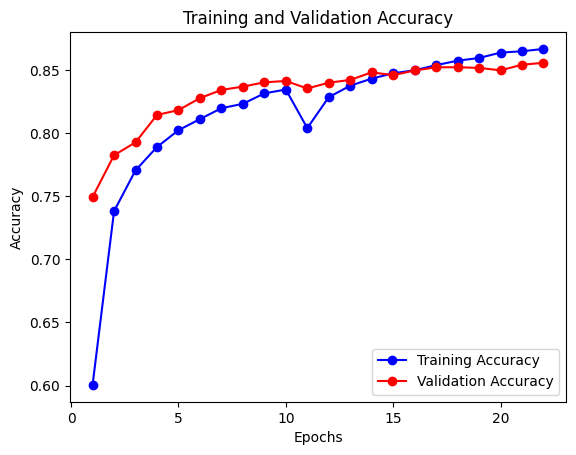

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Evaluate model on test data and get accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Plot accuracy curves
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
